# import libraries


In [138]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

# import dataset

In [139]:
dataset_train=pd.read_csv("NSE-TATAGLOBAL.csv")
training_set=dataset_train.iloc[:,1:2].values

In [140]:
dataset_train.shape

(2035, 8)

In [141]:
training_set.shape


(2035, 1)

In [142]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [143]:
X_train=[]
y_train=[]
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)

In [144]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [145]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [146]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [147]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [148]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [149]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [150]:
regressor.add(Dense(units=1))
regressor.compile(optimizer="adam",loss="mean_squared_error")





In [151]:
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0128
Epoch 2/20
1975/1975 [==============================] - 30s 15ms/step - loss: 0.0032
Epoch 3/20
1975/1975 [==============================] - 29s 15ms/step - loss: 0.0027
Epoch 4/20
1975/1975 [==============================] - 28s 14ms/step - loss: 0.0030
Epoch 5/20
1975/1975 [==============================] - 29s 15ms/step - loss: 0.0024
Epoch 6/20
1975/1975 [==============================] - 28s 14ms/step - loss: 0.0022
Epoch 7/20
1975/1975 [==============================] - 29s 14ms/step - loss: 0.0023
Epoch 8/20
1975/1975 [==============================] - 29s 15ms/step - loss: 0.0022
Epoch 9/20
1975/1975 [==============================] - 29s 14ms/step - loss: 0.0021
Epoch 10/20
1975/1975 [==============================] - 29s 15ms/step - loss: 0.0018
Epoch 11/20
1975/1975 [==============================] - 29s 14ms/step - loss: 0.0018
Epoch 12/20
1975/1975 [==============================] - 29s 15

In [2]:
dataset_test=pd.read_csv("tatatest.csv")
real_stock_price=dataset_test.iloc[:,1:2].values


NameError: name 'pd' is not defined

In [1]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


NameError: name 'pd' is not defined

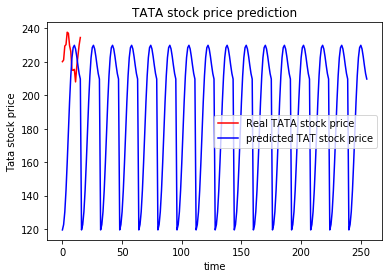

In [154]:
plt.plot(real_stock_price,color="red",label="Real TATA stock price")
plt.plot(predicted_stock_price,color="blue",label="predicted TAT stock price")
plt.title("TATA stock price prediction")
plt.xlabel("time")
plt.ylabel("Tata stock price")
plt.legend()
plt.show()